In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('DATA/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.isnull().sum() # Check if there're missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


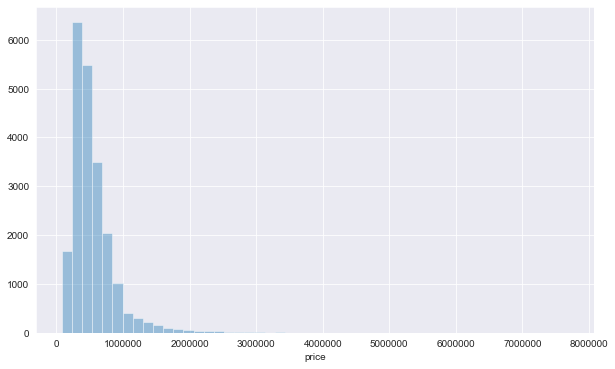

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'], kde=False)

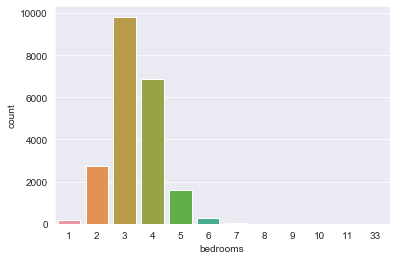

In [7]:
sns.countplot(df['bedrooms'])

In [8]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

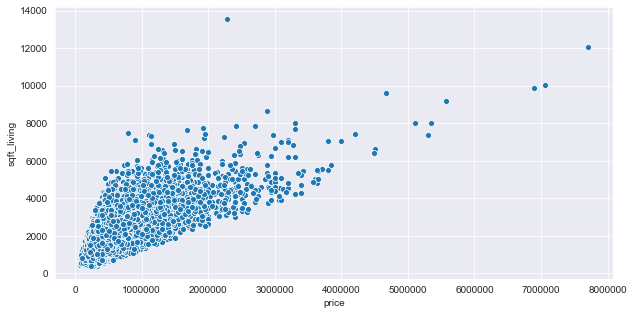

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='sqft_living', data=df)

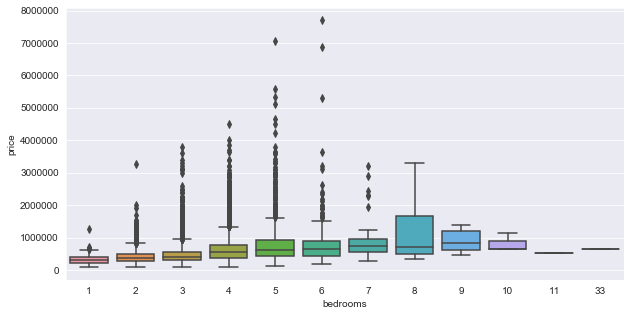

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms',y='price',data=df)

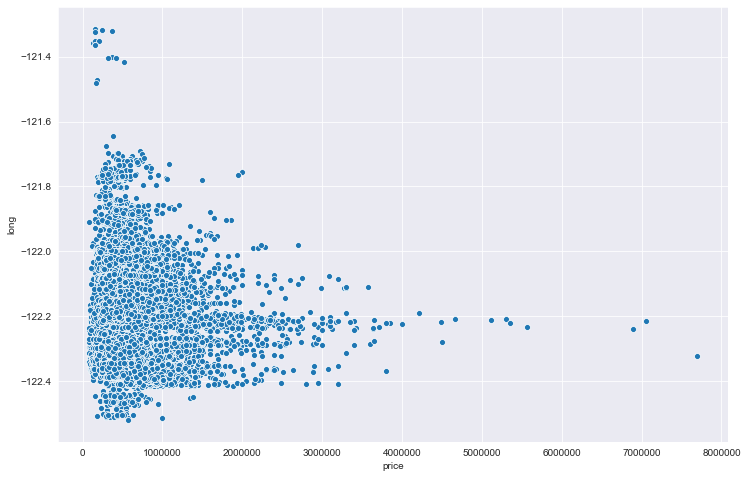

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

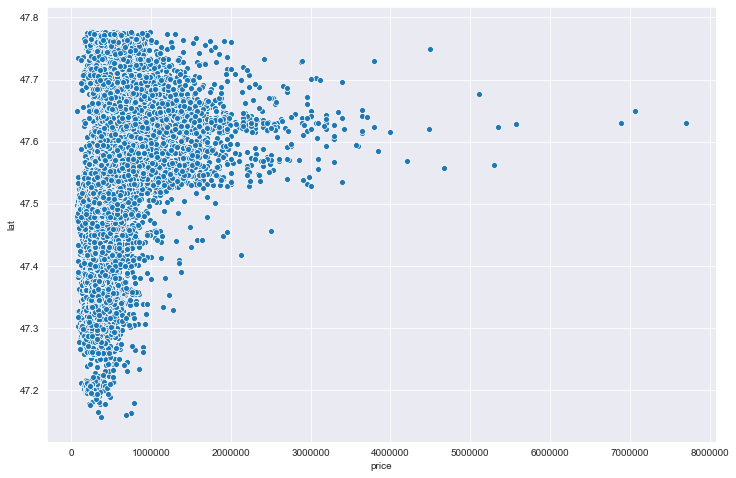

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

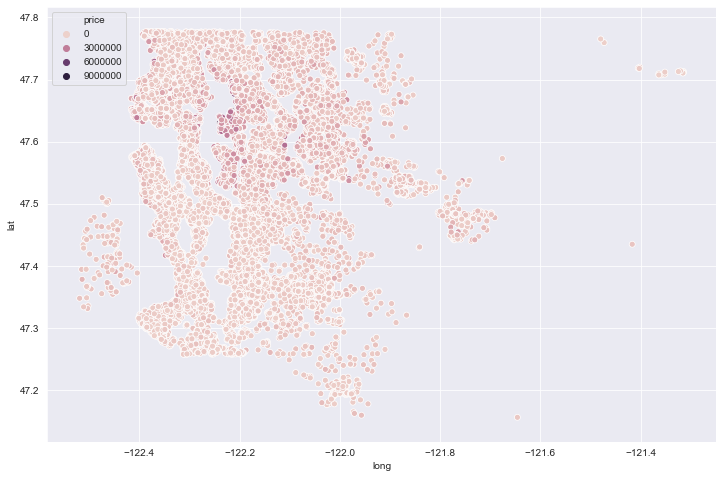

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df, hue='price')

In [14]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [15]:
len(df)*0.01

215.97

In [16]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

In [17]:
non_top_1_perc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


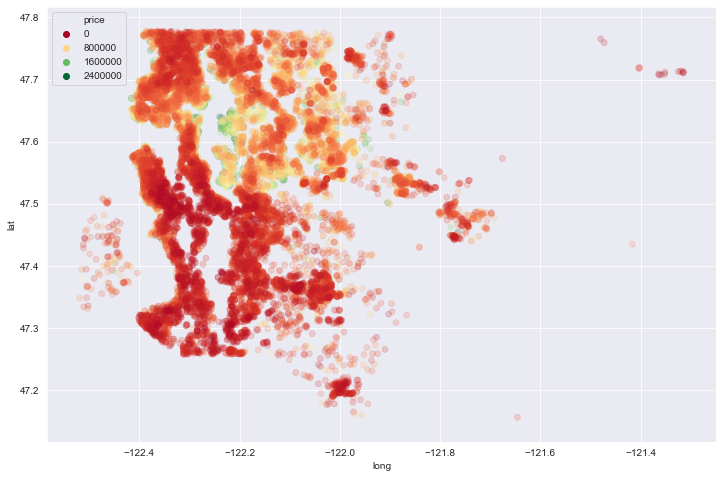

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc, hue='price',
               edgecolor=None,alpha=0.2,palette='RdYlGn')

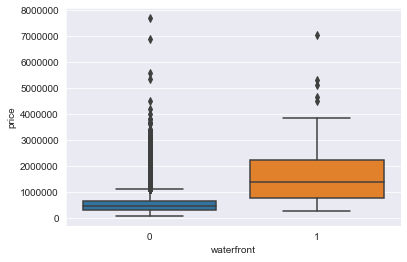

In [19]:
sns.boxplot(x='waterfront',y='price',data=df)

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
df = df.drop('id',axis=1)

In [27]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [32]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [33]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


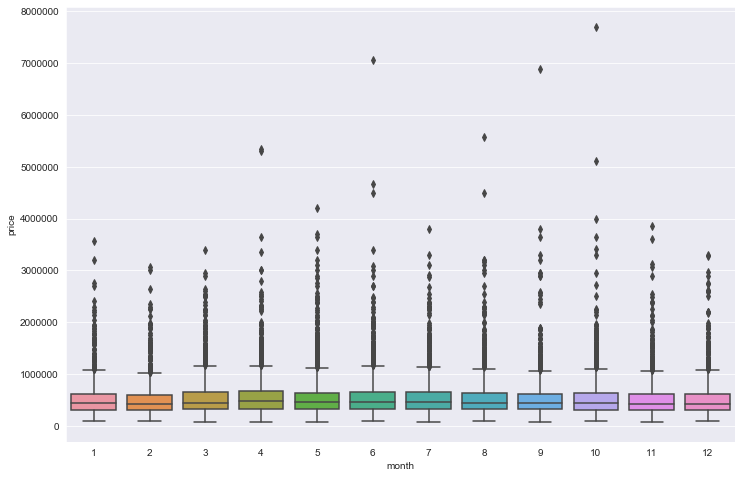

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month', y='price', data=df)

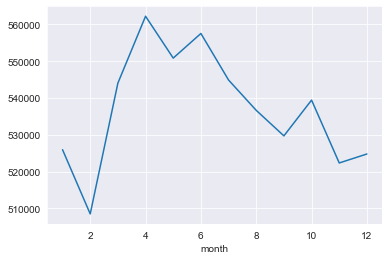

In [40]:
df.groupby('month').mean()['price'].plot()

In [41]:
df = df.drop('date', axis=1)

In [43]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [44]:
df = df.drop('zipcode', axis=1)

In [45]:
df['yr_renovated'].value_counts() # The higher the year value (newly renovated), the higher price likelihood
# So it's okay to keep this as a predictor

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [46]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [48]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [56]:
X_train = scaler.fit_transform(X_train) # Fit based on X_train and transform X_train using that scale in one step

In [57]:
X_test = scaler.transform(X_test)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [59]:
X_train.shape

(15117, 19)

In [60]:
model = Sequential()

model.add(Dense(19, activation='relu')) # We have 19 features, so maybe 19 neurons is a good choice
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [61]:
model.fit(x=X_train, y=y_train,
         validation_data= (X_test,y_test), # Validatin data is not used in training the model so it doesn't leak test data
         batch_size=128, epochs=400)

# batch_size show how large the batches of data are used for training the model - better be in powers of 2
# The smaller the batch_size, the longer it takes to train the model, but less likely to overfit the data

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 45us/sample - loss: 430241570081.7167 - val_loss: 418928809948.6025
Epoch 2/400
15117/15117 [==============================] - 0s 13us/sample - loss: 429459836024.9129 - val_loss: 416296707160.4938
Epoch 3/400
15117/15117 [==============================] - 0s 14us/sample - loss: 419495406420.8253 - val_loss: 394003905670.0049
Epoch 4/400
15117/15117 [==============================] - 0s 14us/sample - loss: 371527031924.3067 - val_loss: 313277635778.6864
Epoch 5/400
15117/15117 [==============================] - 0s 13us/sample - loss: 253023889711.3322 - val_loss: 170019992573.4716
Epoch 6/400
15117/15117 [==============================] - 0s 13us/sample - loss: 129198923444.8952 - val_loss: 98704279931.2593
Epoch 7/400
15117/15117 [==============================] - 0s 13us/sample - loss: 99484573951.1702 - val_loss: 94750948617.4815
Epoch 8/400
15117/15117 [===================

15117/15117 [==============================] - 0s 15us/sample - loss: 37119040414.2536 - val_loss: 35733151673.2049
Epoch 65/400
15117/15117 [==============================] - 0s 14us/sample - loss: 36937827551.0622 - val_loss: 35522075771.8914
Epoch 66/400
15117/15117 [==============================] - 0s 14us/sample - loss: 36760200707.5563 - val_loss: 35377724196.0296
Epoch 67/400
15117/15117 [==============================] - 0s 14us/sample - loss: 36632913669.2328 - val_loss: 35225841623.5457
Epoch 68/400
15117/15117 [==============================] - 0s 13us/sample - loss: 36468832457.7247 - val_loss: 35187745491.1210
Epoch 69/400
15117/15117 [==============================] - 0s 13us/sample - loss: 36334223710.0716 - val_loss: 34978796490.9037
Epoch 70/400
15117/15117 [==============================] - 0s 13us/sample - loss: 36234784884.8825 - val_loss: 34864564820.7012
Epoch 71/400
15117/15117 [==============================] - ETA: 0s - loss: 37064970361.904 - 0s 13us/sample -

Epoch 127/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33178591159.6555 - val_loss: 31710143657.4025
Epoch 128/400
15117/15117 [==============================] - 0s 16us/sample - loss: 33123635465.9745 - val_loss: 31720163671.8617
Epoch 129/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33115412746.7535 - val_loss: 31659187642.4691
Epoch 130/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33082680756.9798 - val_loss: 31631798307.3975
Epoch 131/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33066641549.0312 - val_loss: 31579218461.0765
Epoch 132/400
15117/15117 [==============================] - 0s 16us/sample - loss: 32992659005.5403 - val_loss: 31519858136.8099
Epoch 133/400
15117/15117 [==============================] - 0s 14us/sample - loss: 33104854107.9209 - val_loss: 31527507133.6296
Epoch 134/400
15117/15117 [==============================] - 0s 13us/sample - loss: 329807

15117/15117 [==============================] - 0s 13us/sample - loss: 31811328671.5576 - val_loss: 30036379678.3407
Epoch 191/400
15117/15117 [==============================] - 0s 13us/sample - loss: 31783216012.0320 - val_loss: 29974377752.6519
Epoch 192/400
15117/15117 [==============================] - 0s 13us/sample - loss: 31768858648.2503 - val_loss: 29989888136.5333
Epoch 193/400
15117/15117 [==============================] - ETA: 0s - loss: 32315206046.476 - 0s 13us/sample - loss: 31741193572.1003 - val_loss: 29970842292.7802
Epoch 194/400
15117/15117 [==============================] - 0s 13us/sample - loss: 31751317262.8516 - val_loss: 29953007787.9309
Epoch 195/400
15117/15117 [==============================] - 0s 13us/sample - loss: 31700929259.6954 - val_loss: 29958620865.4222
Epoch 196/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31704984278.1547 - val_loss: 29889667891.2000
Epoch 197/400
15117/15117 [==============================] - 0s 15us/s

Epoch 253/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30911638015.0178 - val_loss: 28972051170.2914
Epoch 254/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30885634451.8558 - val_loss: 28830551077.9259
Epoch 255/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30839363480.4959 - val_loss: 28880206451.0420
Epoch 256/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30895650227.2186 - val_loss: 28822796667.2593
Epoch 257/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30852201997.8525 - val_loss: 28800372417.4222
Epoch 258/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30823002572.0786 - val_loss: 28857724002.6074
Epoch 259/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30848427578.4920 - val_loss: 28749705099.6938
Epoch 260/400
15117/15117 [==============================] - 0s 14us/sample - loss: 307864

15117/15117 [==============================] - 0s 12us/sample - loss: 30178299004.7740 - val_loss: 28002803777.7383
Epoch 317/400
15117/15117 [==============================] - 0s 12us/sample - loss: 30134757300.8105 - val_loss: 27936084453.4519
Epoch 318/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30162878782.6410 - val_loss: 27987404714.0346
Epoch 319/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30149564512.2223 - val_loss: 27952611570.7259
Epoch 320/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30096240998.4711 - val_loss: 27906134774.5185
Epoch 321/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30099251557.3873 - val_loss: 27880821120.3160
Epoch 322/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30093349570.7815 - val_loss: 27851690064.9086
Epoch 323/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30060722370.6799 - v

15117/15117 [==============================] - 0s 16us/sample - loss: 29543880740.1723 - val_loss: 27319545011.5160
Epoch 380/400
15117/15117 [==============================] - 0s 15us/sample - loss: 29538621267.4705 - val_loss: 27241460121.6000
Epoch 381/400
15117/15117 [==============================] - 0s 12us/sample - loss: 29507553332.8359 - val_loss: 27112390524.5235
Epoch 382/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29552050080.3535 - val_loss: 27193185348.2667
Epoch 383/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29480614274.3793 - val_loss: 27080823026.7259
Epoch 384/400
15117/15117 [==============================] - 0s 15us/sample - loss: 29487691753.3754 - val_loss: 27093663587.2395
Epoch 385/400
15117/15117 [==============================] - ETA: 0s - loss: 29749189880.822 - 0s 15us/sample - loss: 29430428620.5866 - val_loss: 27065551990.8346
Epoch 386/400
15117/15117 [==============================] - 0s 15us/s

In [62]:
pd.DataFrame(model.history.history) # Shows the loss on Train data as well as the Validation data

,loss,val_loss
0,4.302416e+11,4.189288e+11
1,4.294598e+11,4.162967e+11
2,4.194954e+11,3.940039e+11
3,3.715270e+11,3.132776e+11
4,2.530239e+11,1.700200e+11
...,...,...
395,2.932599e+10,2.689479e+10
396,2.933076e+10,2.687531e+10
397,2.935187e+10,2.686901e+10
398,2.931770e+10,2.686200e+10


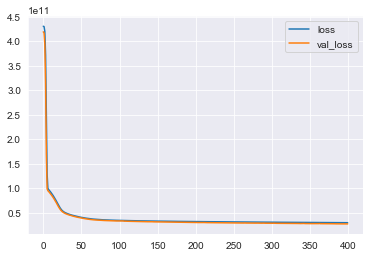

In [63]:
pd.DataFrame(model.history.history).plot()
# If validation loss started to spike after a while, it would mean that the model is overfitting and doesn't do well with test data
# But here both train data and validation data loss decrease together, meaing no overfitting and we can continue training the model


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [65]:
predictions = model.predict(X_test)

In [66]:
mean_absolute_error(y_test, predictions)

102010.75163001544

In [68]:
np.sqrt(mean_squared_error(y_test, predictions)) # RMSE

163980.41878841099

In [69]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [70]:
explained_variance_score(y_test, predictions) # How much variance is explained by the model, 1.0 is the perfect score

0.7977275446568863

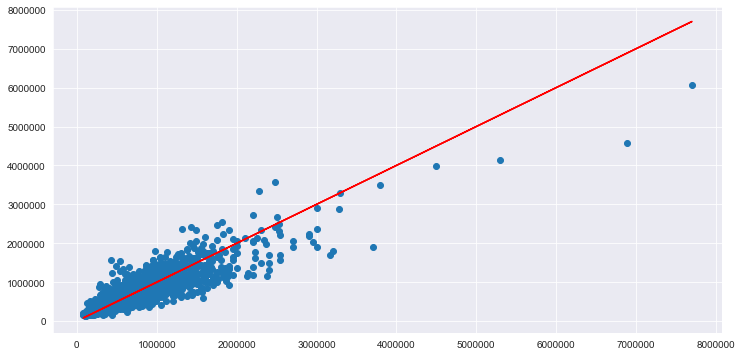

In [78]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r') # Just a trick to plot a 1:1 line

In [105]:
df.drop('price',axis=1).iloc[0] # Take the first house in the dataframe

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [106]:
single_house = df.drop('price',axis=1).iloc[0]

In [107]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [108]:
single_house.values.shape

(19,)

In [109]:
single_house.values.reshape(-1, single_house.values.shape[0])

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [110]:
single_house.values.reshape(-1, single_house.values.shape[0]).shape # reshaping with 1 or -1 gives the same results
# reshape from (19,) to (1, 19) so we can feed it into the model

(1, 19)

In [111]:
single_house = scaler.transform(single_house.values.reshape(-1, single_house.values.shape[0]))

In [113]:
model.predict(single_house)

array([[304601.47]], dtype=float32)

In [114]:
df.head(1) # The real price of the first house - To be compared with the predicted value

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [93]:
df2 = pd.read_csv('DATA/kc_house_data.csv')
df2 = df2.sort_values('price', ascending=False).iloc[216:]

df2= df2.drop('id',axis=1)
df2['date'] = pd.to_datetime(df2['date'])
df2['year'] = df2['date'].apply(lambda date: date.year)
df2['month'] = df2['date'].apply(lambda date: date.month)
df2 = df2.drop('date', axis=1)
df2 = df2.drop('zipcode', axis=1)

In [95]:
X2 = df2.drop('price', axis=1).values
y2 = df2['price'].values

In [96]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=101)
scaler2 = MinMaxScaler()
X_train2 = scaler.fit_transform(X_train2) # Fit based on X_train and transform X_train using that scale in one step
X_test2 = scaler.transform(X_test2)

In [97]:
model2 = Sequential()

model2.add(Dense(19, activation='relu')) # We have 19 features, so maybe 19 neurons is a good choice
model2.add(Dense(19, activation='relu'))
model2.add(Dense(19, activation='relu'))
model2.add(Dense(19, activation='relu'))

model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse')

In [98]:
model2.fit(x=X_train2, y=y_train2,
         validation_data= (X_test2,y_test2), # Validatin data is not used in training the model so it doesn't leak test data
         batch_size=128, epochs=400)

Train on 14966 samples, validate on 6415 samples
Epoch 1/400
14966/14966 [==============================] - 1s 39us/sample - loss: 346856666379.2554 - val_loss: 356758169187.8460
Epoch 2/400
14966/14966 [==============================] - 0s 14us/sample - loss: 344849509906.8160 - val_loss: 349791701904.1022
Epoch 3/400
14966/14966 [==============================] - 0s 14us/sample - loss: 318269853199.5317 - val_loss: 289211848998.6694
Epoch 4/400
14966/14966 [==============================] - 0s 15us/sample - loss: 207416899585.9158 - val_loss: 128817143952.3018
Epoch 5/400
14966/14966 [==============================] - 0s 14us/sample - loss: 75842393580.2261 - val_loss: 56400570074.6076
Epoch 6/400
14966/14966 [==============================] - 0s 12us/sample - loss: 54198026772.5949 - val_loss: 54522804797.6954
Epoch 7/400
14966/14966 [==============================] - 0s 12us/sample - loss: 53085920295.2741 - val_loss: 53510064090.9668
Epoch 8/400
14966/14966 [======================

Epoch 64/400
14966/14966 [==============================] - 0s 14us/sample - loss: 22909087097.5513 - val_loss: 23766815119.8628
Epoch 65/400
14966/14966 [==============================] - 0s 13us/sample - loss: 22882543600.3998 - val_loss: 23752823656.3554
Epoch 66/400
14966/14966 [==============================] - 0s 13us/sample - loss: 22813163661.2225 - val_loss: 23684563933.0419
Epoch 67/400
14966/14966 [==============================] - 0s 13us/sample - loss: 22779798083.9428 - val_loss: 23631521962.6401
Epoch 68/400
14966/14966 [==============================] - 0s 13us/sample - loss: 22751235466.7935 - val_loss: 23629713294.0271
Epoch 69/400
14966/14966 [==============================] - 0s 13us/sample - loss: 22677428127.1148 - val_loss: 23573397354.4306
Epoch 70/400
14966/14966 [==============================] - 0s 13us/sample - loss: 22662711102.5033 - val_loss: 23523970175.8603
Epoch 71/400
14966/14966 [==============================] - 0s 13us/sample - loss: 22600449618.85

14966/14966 [==============================] - 0s 13us/sample - loss: 21236697783.4387 - val_loss: 22201342810.4680
Epoch 128/400
14966/14966 [==============================] - 0s 13us/sample - loss: 21210351449.3246 - val_loss: 22178951800.4377
Epoch 129/400
14966/14966 [==============================] - 0s 13us/sample - loss: 21203750105.4443 - val_loss: 22275535684.1203
Epoch 130/400
14966/14966 [==============================] - 0s 13us/sample - loss: 21207709925.0760 - val_loss: 22153683961.1361
Epoch 131/400
14966/14966 [==============================] - 0s 14us/sample - loss: 21185343183.2495 - val_loss: 22145530556.1191
Epoch 132/400
14966/14966 [==============================] - 0s 15us/sample - loss: 21164474184.9034 - val_loss: 22167911292.9472
Epoch 133/400
14966/14966 [==============================] - 0s 14us/sample - loss: 21172942279.8257 - val_loss: 22129158039.2854
Epoch 134/400
14966/14966 [==============================] - 0s 15us/sample - loss: 21167479641.4614 - v

14966/14966 [==============================] - 0s 13us/sample - loss: 20853469575.6461 - val_loss: 21768567225.8444
Epoch 190/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20848107396.2935 - val_loss: 21794491330.8633
Epoch 191/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20840579050.3787 - val_loss: 21761814023.5822
Epoch 192/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20833625965.0301 - val_loss: 21759263308.0617
Epoch 193/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20831622381.6972 - val_loss: 21758858711.0560
Epoch 194/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20818862048.2523 - val_loss: 21752712222.4885
Epoch 195/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20825873063.2912 - val_loss: 21776231919.9576
Epoch 196/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20825676407.9433 - v

Epoch 252/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20689893301.0098 - val_loss: 21586475344.1721
Epoch 253/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20679078288.6778 - val_loss: 21623829441.2670
Epoch 254/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20684621515.2810 - val_loss: 21591519082.5902
Epoch 255/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20680955899.0736 - val_loss: 21619820249.3306
Epoch 256/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20695996519.4537 - val_loss: 21582893073.2396
Epoch 257/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20683957458.6022 - val_loss: 21577837168.4564
Epoch 258/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20675820317.3871 - val_loss: 21575856802.5790
Epoch 259/400
14966/14966 [==============================] - 0s 12us/sample - loss: 206801

14966/14966 [==============================] - 0s 12us/sample - loss: 20585353096.6725 - val_loss: 21475541087.4563
Epoch 315/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20619642217.4037 - val_loss: 21474547006.7729
Epoch 316/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20604383075.3142 - val_loss: 21492065157.5670
Epoch 317/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20593727136.8596 - val_loss: 21470164130.9780
Epoch 318/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20588997590.2627 - val_loss: 21477276255.8553
Epoch 319/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20584336731.9930 - val_loss: 21494732343.4700
Epoch 320/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20606255317.2022 - val_loss: 21529456774.4050
Epoch 321/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20598151613.0151 - v

14966/14966 [==============================] - 0s 12us/sample - loss: 20507856690.4610 - val_loss: 21391317406.7080
Epoch 378/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20522394099.3420 - val_loss: 21387212020.3872
Epoch 379/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20500011005.8105 - val_loss: 21391778729.3232
Epoch 380/400
14966/14966 [==============================] - 0s 14us/sample - loss: 20517143408.0406 - val_loss: 21379477450.0465
Epoch 381/400
14966/14966 [==============================] - 0s 14us/sample - loss: 20499072203.2126 - val_loss: 21369347401.6274
Epoch 382/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20494749073.6357 - val_loss: 21389802719.3166
Epoch 383/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20489907728.9002 - val_loss: 21372277294.3713
Epoch 384/400
14966/14966 [==============================] - 0s 14us/sample - loss: 20486749336.5805 - v

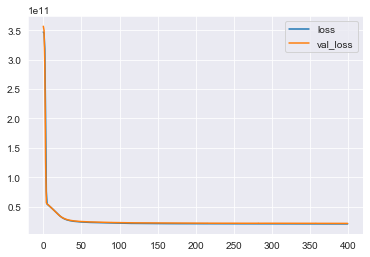

In [99]:
pd.DataFrame(model2.history.history).plot()

In [100]:
predictions2 = model2.predict(X_test2)

In [101]:
mean_absolute_error(y_test2, predictions2)

97890.5763554657

In [103]:
df2['price'].describe()

count    2.138100e+04
mean     5.183675e+05
std      2.849428e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      1.970000e+06
Name: price, dtype: float64

In [104]:
explained_variance_score(y_test2, predictions2) # How much variance is explained by the model, 1.0 is the perfect score

0.7410433653037479